# **Import Necessary Libraries**

In [ ]:
import numpy as np #for numerical ops
import pandas as pd #to analyze data
import plotly.express as px #to plot graph
import matplotlib.pyplot as plt #to plot graph/visulas
import seaborn as sns #tp plot graph
import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# **Exploratory Data Analysis**

## Explore the data and features

In [ ]:
data = pd.read_csv('breast-cancer.csv')

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Overview of Target variable - Diagnosis

In [ ]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [ ]:
px.pie(data, 'diagnosis', color='diagnosis',color_discrete_sequence=['#007522','#5CDD5C'],title='Data Distribution')

## Exploratory data analysis

### Overall EDA

In [ ]:
data[data.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


### Visualize data to identify the missing value

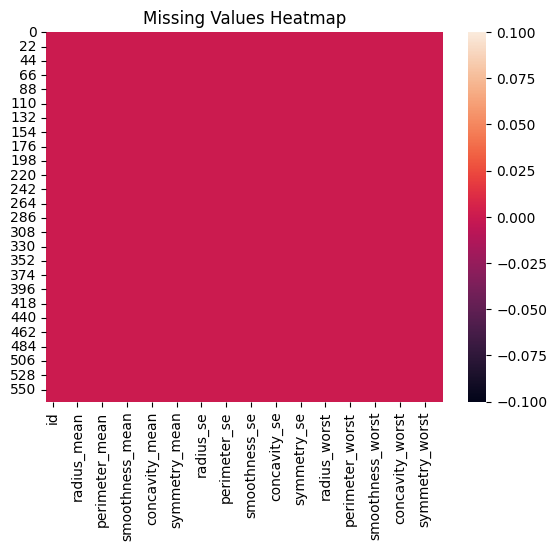

No missing values in the data.


In [ ]:
sns.heatmap(data.isnull())
plt.title("Missing Values Heatmap")
plt.show()

#check the data and state if there's missing value
if data.isnull().values.any():
    print("Data contains missing values.")
else:
    print("No missing values in the data.")

In [ ]:
#missing valiues
data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


### Drop irrelevant columns like ID

In [ ]:
data.drop(['id'],axis=1,inplace=True)
data.shape #col-=1

(569, 31)

In [ ]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Check if there's any identical columns (in terms of the values)

In [ ]:
#List to store duplicate column pairs
duplicate_columns = []

#Compare each pair of columns
for i in range(len(data.columns)):
    for j in range(i + 1, len(data.columns)):
        col1 = data.columns[i]
        col2 = data.columns[j]
        if data[col1].equals(data[col2]):
            duplicate_columns.append((col1, col2))

#Print results
if duplicate_columns:
    print("Columns with identical values:")
    for pair in duplicate_columns:
        print(f"{pair[0]} and {pair[1]}")
else:
    print("No columns have identical values.")


No columns have identical values.


### Encode the target variable as it is in categorical

In [ ]:
data['diagnosis']=data['diagnosis'].map({'M': 1, 'B': 0})
data['diagnosis']

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


## **Data Visualization**

In [ ]:
for column in  data.drop('diagnosis',axis=1).columns[:5]:
    fig = px.box(data_frame=data,x='diagnosis',color='diagnosis',y=column,color_discrete_sequence=['#007500','#5CFF5C'],orientation='v')
    fig.show()

In [ ]:
for column in  data.drop('diagnosis',axis=1).columns[5:10]:
    fig = px.scatter(data_frame=data,color='diagnosis',x=column,color_discrete_sequence=['#007500','#5CFF5C'],)
    fig.show()

# **Correlation Heatmap**

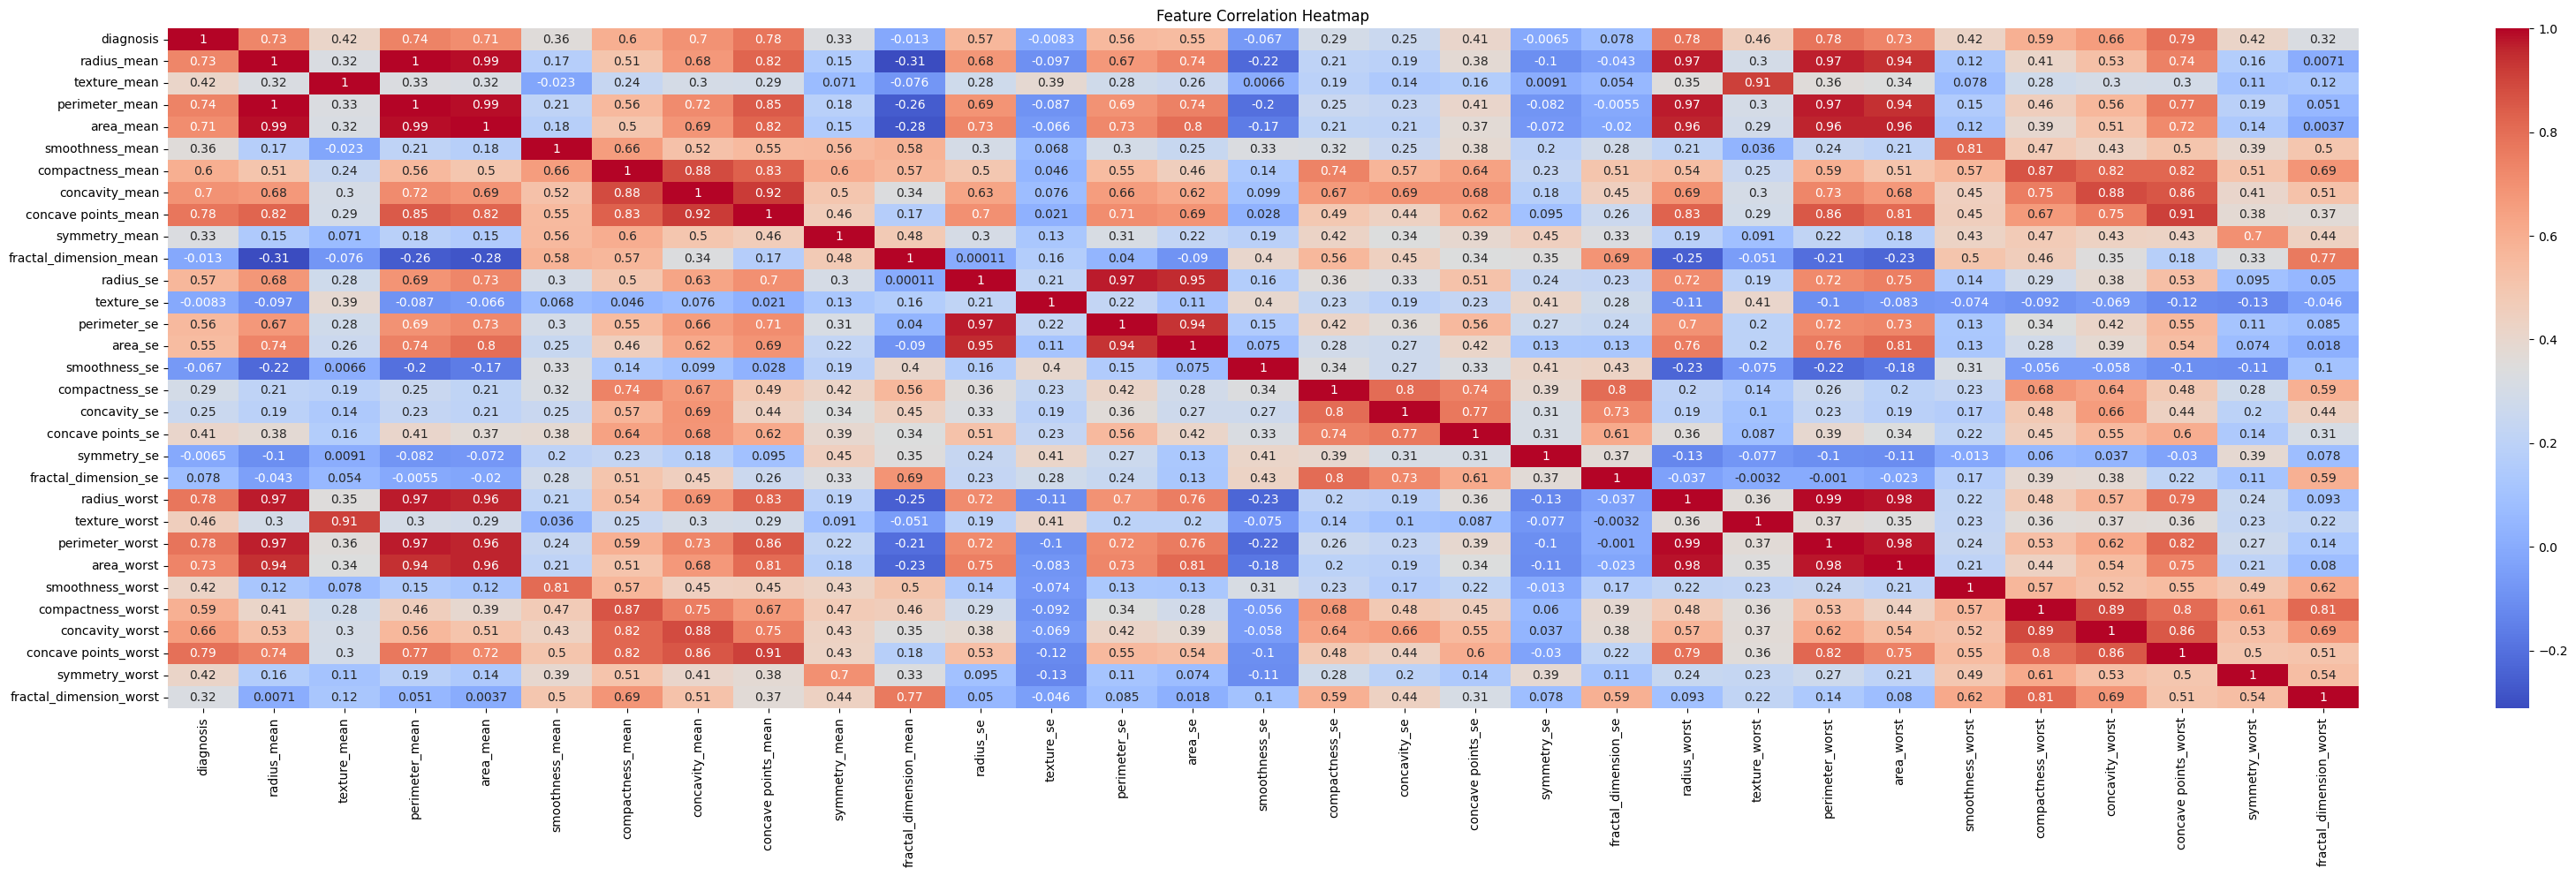

In [ ]:
plt.figure(figsize=(40,10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

### Most Highly Correlated Feature Pairs

In [ ]:
import pandas as pd

#Get correlation matrix
corr_matrix = data.corr()

#Unstack to turn it into a Series of pairs
corr_pairs = corr_matrix.unstack()

#Drop self-correlations (i.e., correlation of a feature with itself = 1)
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

#Drop duplicate pairs (A-B and B-A are the same)
corr_pairs = corr_pairs.groupby([frozenset(i) for i in corr_pairs.index]).mean()

#Sort by absolute correlation value, descending
sorted_corr_pairs = corr_pairs.reindex(corr_pairs.abs().sort_values(ascending=False).index)

#Display top N (optional)
print("Top correlated feature pairs:\n")
print(sorted_corr_pairs.head(20))  # or .to_frame().head()

Top correlated feature pairs:

(radius_mean, perimeter_mean)            0.997855
(perimeter_worst, radius_worst)          0.993708
(radius_mean, area_mean)                 0.987357
(area_mean, perimeter_mean)              0.986507
(area_worst, radius_worst)               0.984015
(perimeter_worst, area_worst)            0.977578
(radius_se, perimeter_se)                0.972794
(perimeter_worst, perimeter_mean)        0.970387
(radius_mean, radius_worst)              0.969539
(perimeter_mean, radius_worst)           0.969476
(radius_mean, perimeter_worst)           0.965137
(area_mean, radius_worst)                0.962746
(area_worst, area_mean)                  0.959213
(perimeter_worst, area_mean)             0.959120
(radius_se, area_se)                     0.951830
(area_worst, perimeter_mean)             0.941550
(radius_mean, area_worst)                0.941082
(perimeter_se, area_se)                  0.937655
(concave points_mean, concavity_mean)    0.921391
(texture_worst, tex

In [ ]:
print("Observation:")
print("Most features have high positive correlations between their mean and worst values,")
print("suggesting consistency in feature behavior across different measurements.")
print("Some features aren't correlated with the target maybe we should remove them like those less than 0.25/0.5.")

Observation:
Most features have high positive correlations between their mean and worst values,
suggesting consistency in feature behavior across different measurements.
Some features aren't correlated with the target maybe we should remove them like those less than 0.25/0.5.


# **Feature and Target Selection**

### Feature Selection

In [ ]:
# Get the absolute value of the correlation with the target ('diagnosis')
cor_target = abs(corr_matrix["diagnosis"])

# Select highly correlated features (threshold = 0.25)
relevant_features = cor_target[cor_target > 0.25]

# Collect the names of the relevant features
names = [index for index, value in relevant_features.items()]

# Drop the target variable from the list of features
if 'diagnosis' in names:
    names.remove('diagnosis')

# Display the results
pprint.pprint(names)

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']


### Assign trainning data and training labels

In [ ]:
X = data[names].values
y = data['diagnosis']

# **Balancd data SMOTE**

In [ ]:
smote = SMOTE(random_state=42)
X, y= smote.fit_resample(X, y)

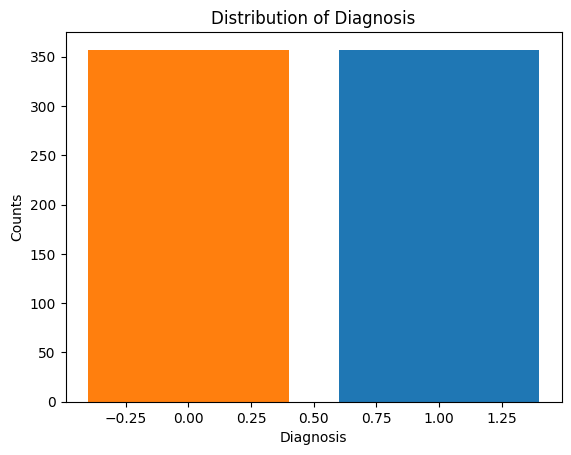

In [ ]:
counts = y.value_counts()
colors = ['#1f77b4', '#ff7f0e']

# Create the bar plot
plt.bar(counts.index, counts.values, color=colors)

# Set the title and labels
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Counts')

# Display the plot
plt.show()


# **Scaling the Data**

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_scaled = scaler.fit_transform(X)  # Fit and transform on the whole feature set

# **Train Test Split** (80:20)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (571, 25)
Test data shape: (143, 25)


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(571, 25)
(571,)
(143, 25)
(143,)


# **Part 2: Model Development**

In [ ]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

import matplotlib.pyplot as plt

# Logistic Regression

Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        69
           1       0.99      0.99      0.99        74

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



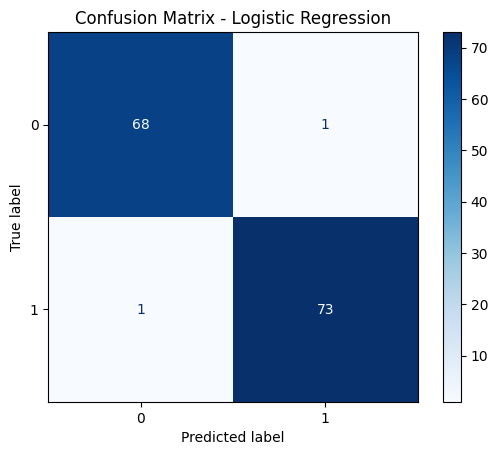

Logistic Regression Accuracy: 0.9860


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score

# Initialize the model
logreg = LogisticRegression()

# Fit on training data
logreg.fit(X_train, y_train)

# Predict on test data
y_pred_logreg = logreg.predict(X_test)

# Evaluate
print("Logistic Regression Evaluation:")
print(classification_report(y_test, y_pred_logreg))

# Confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg.classes_)
disp_logreg.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Accuracy
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")


# Random Forest Classifier

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        69
           1       0.96      0.99      0.97        74

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



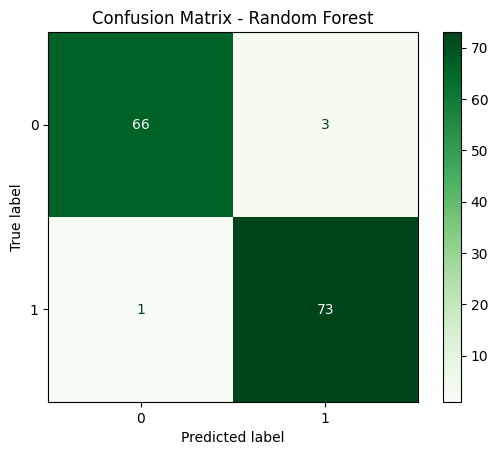

Random Forest Accuracy: 0.9720


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Fit on training data
rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Evaluation:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp_rf.plot(cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


# XGBOOST

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[03:15:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        69
           1       0.95      1.00      0.97        74

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



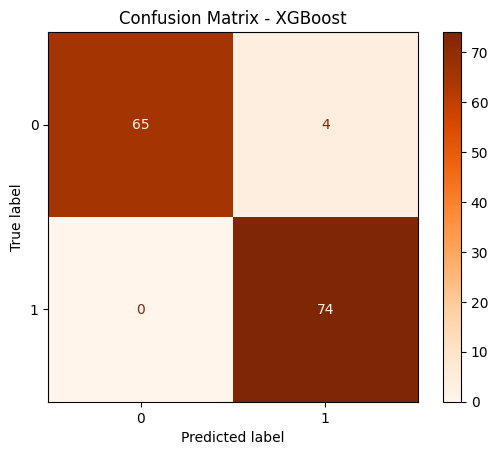

XGBoost Accuracy: 0.9720


In [ ]:
# XGBoost
from xgboost import XGBClassifier

# Initialize the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit on training data
xgb.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb.predict(X_test)

# Evaluate
print("XGBoost Evaluation:")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb.classes_)
disp_xgb.plot(cmap='Oranges')
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Accuracy
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")


# Model Comparison

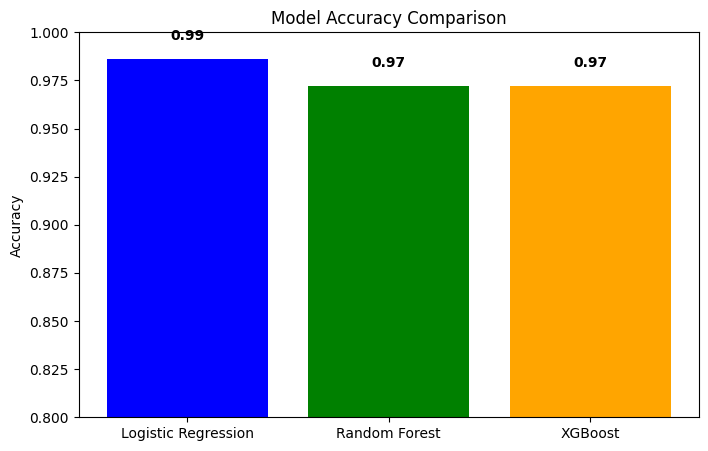

In [ ]:
# Compare model accuracies
model_accuracies = {
    'Logistic Regression': logreg_accuracy,
    'Random Forest': rf_accuracy,
    'XGBoost': xgb_accuracy
}

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'orange'])
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.title('Model Accuracy Comparison')
for i, v in enumerate(model_accuracies.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()


#**Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score , f1_score

**Logistic Regression**

In [ ]:
# Logistic Regression
print("Logistic Regression Evaluation: ")
y_pred_logreg = logreg.predict(X_test)

# Accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(" Accuracy:", accuracy_logreg)

# Precision
precision_logreg = precision_score(y_test, y_pred_logreg)
print(" Precision:", precision_logreg)

# Recall
recall_logreg = recall_score(y_test, y_pred_logreg)
print(" Recall:", recall_logreg)

#F-1 Score
f1_logreg = f1_score(y_test, y_pred_logreg)
print(" F1 Score:", f1_logreg)

Logistic Regression Evaluation: 
 Accuracy: 0.986013986013986
 Precision: 0.9864864864864865
 Recall: 0.9864864864864865
 F1 Score: 0.9864864864864865


**Random Forest**

In [ ]:
#Random Forest
print("Random Forest Evaluation:")
y_pred_rf = rf.predict(X_test)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(" Accuracy:", accuracy_rf)

# Precision
precision_rf = precision_score(y_test, y_pred_rf)
print(" Precision:", precision_rf)

# Recall
recall_rf = recall_score(y_test, y_pred_rf)
print(" Recall:", recall_rf)

#F-1 Score
f1_rf = f1_score(y_test, y_pred_rf)
print(" F1 Score:", f1_rf)

Random Forest Evaluation:
 Accuracy: 0.972027972027972
 Precision: 0.9605263157894737
 Recall: 0.9864864864864865
 F1 Score: 0.9733333333333334


In [ ]:
#XGBoost
print("XGBoost Evaluation:")
y_pred_xgb = xgb.predict(X_test)

# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(" Accuracy:", accuracy_xgb)

# Precision
precision_xgb = precision_score(y_test, y_pred_xgb)
print(" Precision:", precision_xgb)

# Recall
recall_xgb = recall_score(y_test, y_pred_xgb)
print(" Recall:", recall_xgb)

#F-1 Score
f1_xgb = f1_score(y_test, y_pred_xgb)
print(" F1 Score:", f1_xgb)

XGBoost Evaluation:
 Accuracy: 0.972027972027972
 Precision: 0.9487179487179487
 Recall: 1.0
 F1 Score: 0.9736842105263158


In [ ]:
# Evaluation for all models
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

# Calculate metrics
metrics = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_logreg),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    'Precision': [
        precision_score(y_test, y_pred_logreg),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb)
    ],
    'Recall': [
        recall_score(y_test, y_pred_logreg),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_logreg),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ]
}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics)

# Round the values nicely
metrics_df = metrics_df.round(4)

# Display the table
print(metrics_df)


                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression     0.986     0.9865  0.9865    0.9865
1        Random Forest     0.972     0.9605  0.9865    0.9733
2              XGBoost     0.972     0.9487  1.0000    0.9737


In [ ]:
#generate comparison graphs for all 3 models for their performance metrics

import plotly.graph_objects as go

# Create traces for each model's metrics
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=metrics_df['Model'],
    y=metrics_df['Accuracy'],
    mode='lines+markers',
    name='Accuracy'
))

fig.add_trace(go.Scatter(
    x=metrics_df['Model'],
    y=metrics_df['Precision'],
    mode='lines+markers',
    name='Precision'
))

fig.add_trace(go.Scatter(
    x=metrics_df['Model'],
    y=metrics_df['Recall'],
    mode='lines+markers',
    name='Recall'
))

fig.add_trace(go.Scatter(
    x=metrics_df['Model'],
    y=metrics_df['F1 Score'],
    mode='lines+markers',
    name='F1 Score'
))

# Update layout for better visualization
fig.update_layout(
    title="Comparison of Model Performance Metrics",
    xaxis_title="Model",
    yaxis_title="Score",
    yaxis_range=[0.9, 1.1],  # Adjust range as needed
)

fig.show()


**Insights and Comparison**

**Logistic Regression**:

High Performance Across the Board:

Logistic Regression emerges as the strongest performer overall with the highest accuracy (0.986) and nearly perfect precision, recall, and F1-score (all around 0.9865). This indicates a balanced and robust performance in classifying both malignant and benign cases with very few errors.

Simplicity and Interpretability:

Logistic Regression models are relatively simple and easy to interpret, making them valuable in medical contexts where understanding the reasoning behind predictions is important.

**Random Forest:**

Good Overall Performance:

Random Forest shows good overall performance with an accuracy of 0.972.

Slightly Lower Precision:

Its precision (0.9605) is a bit lower than Logistic Regression, indicating a higher rate of false positives (classifying benign tumors as malignant).

Comparable Recall and F1-Score:

Its recall (0.9865) is similar to Logistic Regression, and the F1-score (0.9733) reflects a good balance between precision and recall.

**XGBoost**:

Good Overall Performance:

XGBoost also achieves an accuracy of 0.972, comparable to Random Forest.

Lowest Precision:

It has the lowest precision (0.9487) among the three models, implying a higher tendency to produce false positives.

Perfect Recall:

Notably, XGBoost boasts a perfect recall (1.0000), meaning it correctly identifies all actual malignant cases, minimizing false negatives (missing malignant tumors).

High F1-Score:
Its F1-score (0.9737) is slightly higher than Random Forest, reflecting the perfect recall despite the lower precision.



##**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Use StratifiedKFold for balanced class distribution in folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []
for model_name, model in models.items():
    # Collect scores for each fold
    fold_scores = {
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1 Score': []
    }

    for train_index, test_index in cv.split(X_scaled, y):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        fold_scores['Accuracy'].append(accuracy_score(y_test, y_pred))
        fold_scores['Precision'].append(precision_score(y_test, y_pred))
        fold_scores['Recall'].append(recall_score(y_test, y_pred))
        fold_scores['F1 Score'].append(f1_score(y_test, y_pred))

    # Calculate mean and standard deviation across folds
    mean_scores = {metric: np.mean(scores) for metric, scores in fold_scores.items()}
    std_scores = {metric: np.std(scores) for metric, scores in fold_scores.items()}

    results.append({
        'Model': model_name,
        **mean_scores,  # Unpack mean scores
        **{f'{metric} Std': std for metric, std in std_scores.items()}  # Unpack std scores
    })
# Create DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[03:16:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[03:16:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[03:16:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[03:16:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[03:16:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




                 Model  Accuracy  Precision    Recall  F1 Score  Accuracy Std  \
0  Logistic Regression  0.970560   0.978075  0.963615  0.970399      0.014358   
1        Random Forest  0.960780   0.961459  0.960837  0.960886      0.010483   
2              XGBoost  0.967773   0.970142  0.966432  0.967895      0.013746   

   Precision Std  Recall Std  F1 Score Std  
0       0.025093    0.022829      0.014181  
1       0.021097    0.016247      0.010126  
2       0.027295    0.018946      0.013417  


**Model Stability (Standard Deviation)**:

The standard deviation values (e.g., "Accuracy Std") represent the variability in performance across different folds of cross-validation.

**Lower standard deviation is generally better, as it indicates that the model's performance is more consistent and less sensitive to variations in the training data.**

**In this case, Random Forest has the lowest standard deviation across most metrics, suggesting it's the most stable model among the three.**

Logistic Regression shows slightly higher variability in accuracy and precision, while XGBoost has a relatively higher standard deviation in precision.

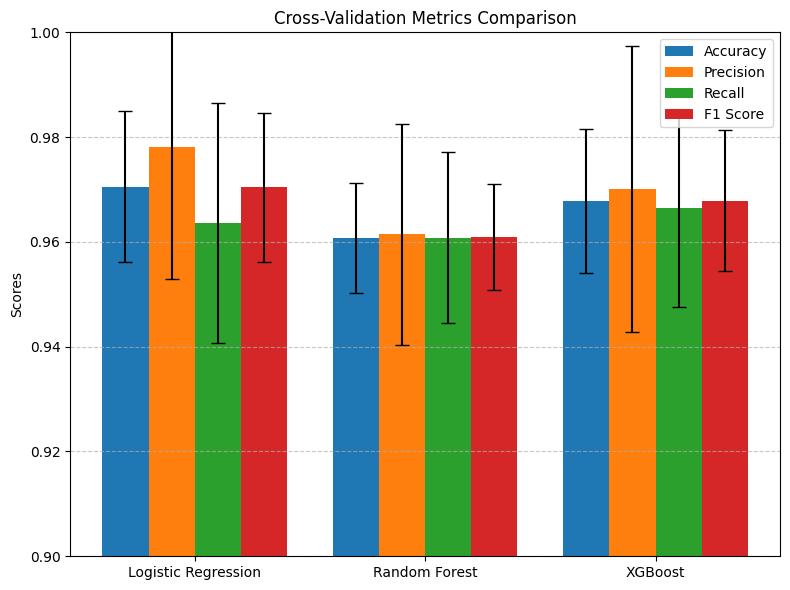

In [ ]:
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracy = [0.970560, 0.960780, 0.967773]
precision = [0.978075, 0.961459, 0.970142]
recall = [0.963615, 0.960837, 0.966432]
f1_score = [0.970399, 0.960886, 0.967895]

# Standard deviations
accuracy_std = [0.014358, 0.010483, 0.013746]
precision_std = [0.025093, 0.021097, 0.027295]
recall_std = [0.022829, 0.016247, 0.018946]
f1_score_std = [0.014181, 0.010126, 0.013417]

# Positioning for bars
x = np.arange(len(models))  # label locations
width = 0.2  # width of the bars

# Create subplots
fig, ax = plt.subplots(figsize=(8,6))

# Plotting bars with error bars
rects1 = ax.bar(x - 1.5*width, accuracy, width, yerr=accuracy_std, label='Accuracy', capsize=5)
rects2 = ax.bar(x - 0.5*width, precision, width, yerr=precision_std, label='Precision', capsize=5)
rects3 = ax.bar(x + 0.5*width, recall, width, yerr=recall_std, label='Recall', capsize=5)
rects4 = ax.bar(x + 1.5*width, f1_score, width, yerr=f1_score_std, label='F1 Score', capsize=5)

# Labels and title
ax.set_ylabel('Scores')
ax.set_title('Cross-Validation Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.set_ylim(0.90, 1.00)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


**🔍 Cross-Validation Results Summary**

**1.Logistic Regression**

Accuracy: ~0.97

Precision: ~0.978

Recall: ~0.965

F1 Score: ~0.97

**Error Bars (Variance)**:
**Fairly large, especially for Precision and Recall**

**Observations:**

While precision is the highest, the error bars suggest higher variability in model performance across folds.

Slightly better average metrics than Random Forest, but less stable.

**2.Random Forest (our deployed model)**

Accuracy / Precision / Recall / F1: All around ~0.961

**Error Bars**: **Smallest and most consistent among all models**

**Observations:**

The most stable model with lowest variance.

Metrics are slightly lower than Logistic Regression and XGBoost, but only marginally so.

Likely to generalize well due to consistent performance across folds.

**3.XGBoost**

Accuracy: ~0.968

Precision: ~0.97

Recall / F1: ~0.967

**Error Bars: Moderate variability**

**Observations:**

Strong performer with slightly better metrics than Random Forest.

More variability than Random Forest, especially in precision.

May slightly outperform Random Forest but at the cost of model complexity and interpretability.




Final Model Comparison (Average Cross-Validation Metrics):
                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression    0.9706     0.9781  0.9636    0.9704
1        Random Forest    0.9608     0.9615  0.9608    0.9609
2              XGBoost    0.9678     0.9701  0.9664    0.9679


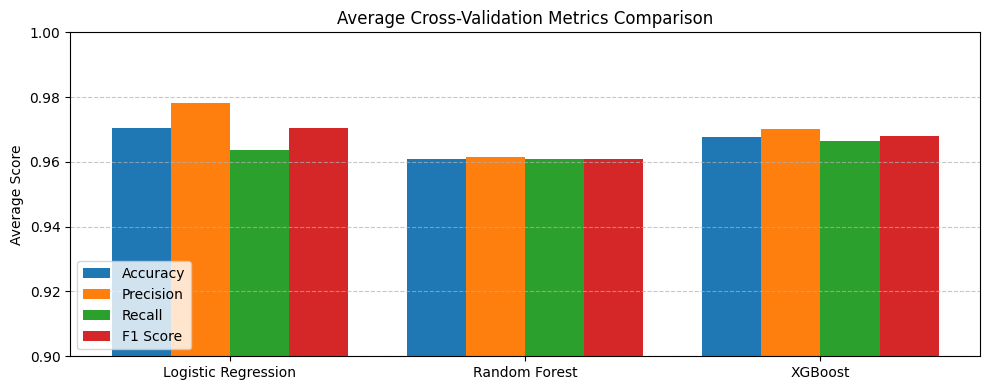

In [ ]:
# Display the final model comparison table
print("\nFinal Model Comparison (Average Cross-Validation Metrics):")
# Select only the mean metrics columns and round them for the final display
final_comparison_df = results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']].round(4)
print(final_comparison_df)


# Alternatively, if you want a simple bar chart of just the average metrics:
fig, ax = plt.subplots(figsize=(10, 4))

bar_width = 0.2  # Adjust width as needed

rects_acc = ax.bar(x - 1.5*bar_width, final_comparison_df['Accuracy'], bar_width, label='Accuracy')
rects_prec = ax.bar(x - 0.5*bar_width, final_comparison_df['Precision'], bar_width, label='Precision')
rects_rec = ax.bar(x + 0.5*bar_width, final_comparison_df['Recall'], bar_width, label='Recall')
rects_f1 = ax.bar(x + 1.5*bar_width, final_comparison_df['F1 Score'], bar_width, label='F1 Score')

ax.set_ylabel('Average Score')
ax.set_title('Average Cross-Validation Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(final_comparison_df['Model'])
ax.legend(loc='lower left')
ax.set_ylim(0.90, 1.00)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

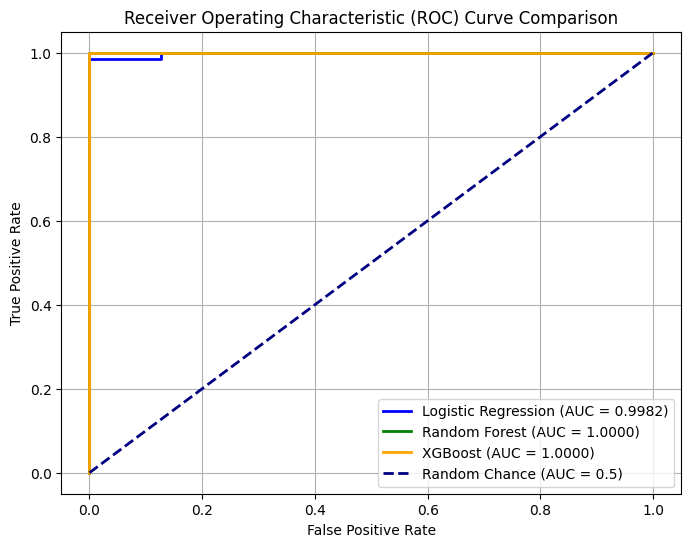

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (class 1)
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for each model
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.4f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot(fpr_xgb, tpr_xgb, color='orange', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.4f})')

# Plot the diagonal line representing random chance
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Chance (AUC = 0.5)')

# Set plot title and labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# **Was Random Forest the Right Choice for Deployment?**

Yes Here's why:

**Stability:**

Lowest error bars across all metrics - most reliable across different data splits.

**Simplicity & Interpretability:**

Easier to explain to stakeholders compared to XGBoost.

**Speed:**

Faster to train and deploy than XGBoost.

**Robustness:**

Less prone to overfitting due to ensemble nature and internal bootstrapping.

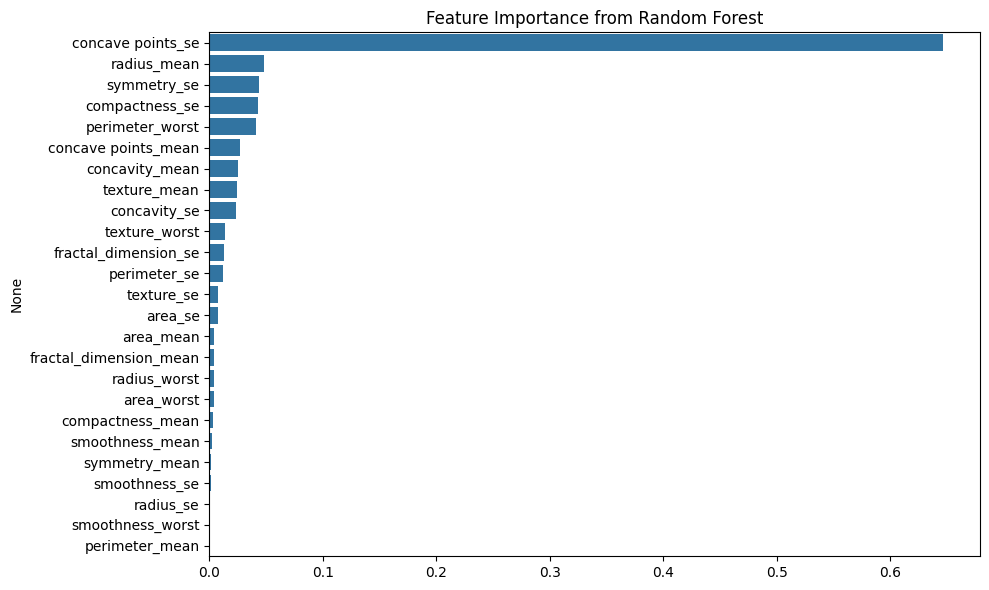

In [ ]:
# Feature Importance Plot
importances = model.feature_importances_
features = data.drop('diagnosis', axis=1).columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()

**💉 Real-World Impact of Cancer Classification**

In medical diagnosis, especially with cancer:

False negatives (saying a malignant tumor is benign) can delay life-saving treatment.

False positives (saying a benign tumor is malignant) can lead to unnecessary stress, biopsies, and treatment.

So we need a model that's:

✅ Stable

✅ Robust

✅ Interpretable

✅ Fast enough for deployment

And Random Forest  is most suitable accordint to our evaluation

🌲 Why Random Forest Makes Sense for Cancer Prediction:

✅ 1. Stability:

Observations about the smallest standard deviation across metrics mean the model's predictions are consistent across different samples or data splits.

In a clinical setting, this means doctors can rely on it to perform well, even on slightly different patient datasets.

We avoid **big fluctuations in accuracy, precision, or recall ** ,which is vital in life-critical decisions.

✅ 2. Interpretability:

Random Forests provide feature importance — doctors can see which symptoms or measurements (like radius mean, texture, etc.) contributed most to a decision.

Unlike black-box models like deep neural nets, Random Forests let us say, “Here's why we think it's malignant,” which is necessary for clinical accountability.

✅ 3. Training & Inference Speed:

Random Forests are faster to train and lighter to deploy than models like XGBoost, making them great for systems in real-time screening centers or smaller clinics with limited computational power.

✅ 4. Robustness to Overfitting:

Due to bootstrapping (bagging) and ensemble voting, Random Forests resist overfitting even with noisy or slightly imbalanced data.

This is especially useful in medical data where datasets are often imbalanced (e.g., fewer malignant than benign cases).

🧬**Real-World Relevance**

Let's imagine our model is deployed in a hospital diagnostic system:

A new patient's test results come in.

The Random Forest gives a stable, explainable decision within seconds.

Doctors are shown which features contributed most to the result, giving them confidence in whether to proceed with a biopsy or not.

In future audits or legal reviews, the predictions are traceable and explainable.

That's the kind of system that saves time, builds trust, and ultimately — saves lives.